<a href="https://colab.research.google.com/github/farukemrekaraca/ztm-tensorflow-machinelearning-deeplearning/blob/main/02_neural_network_classification_with_tensorflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

In [41]:
from matplotlib import pyplot as plt

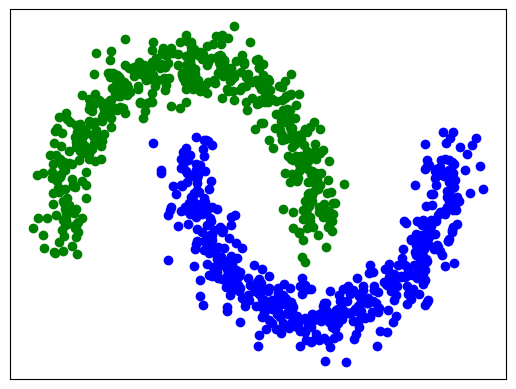

In [42]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "go")

plt.xticks([])
plt.yticks([])

plt.show()

In [43]:
import tensorflow as tf
import pandas as pd
import numpy as np

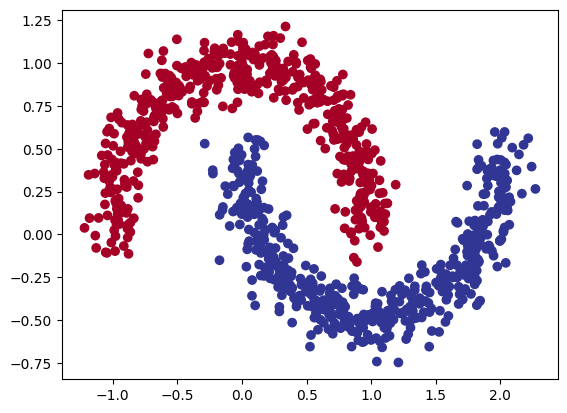

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [45]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 0.5389 - accuracy: 0.6810
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.7980
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8320
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.8510
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.8600


In [46]:
model_1.fit(X, y, epochs=200, verbose=0)

In [47]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9990


[0.01521715521812439, 0.9990000128746033]

In [48]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
binary classification


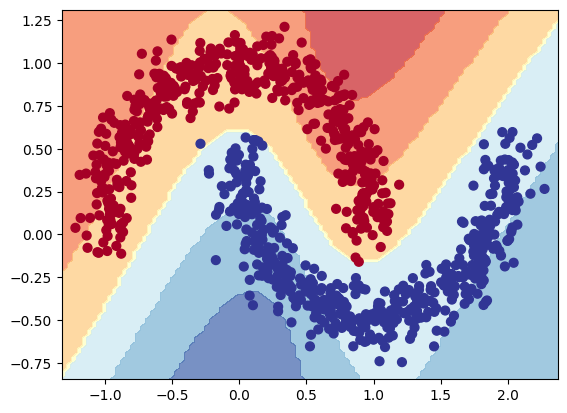

In [49]:
plot_decision_boundary(model=model_1,
                       X=X,
                       y=y)

In [50]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [54]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=200, verbose=0)

In [55]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9600


[0.09020552039146423, 0.9599999785423279]

313/313 [==============================] - 0s 1ms/step
binary classification


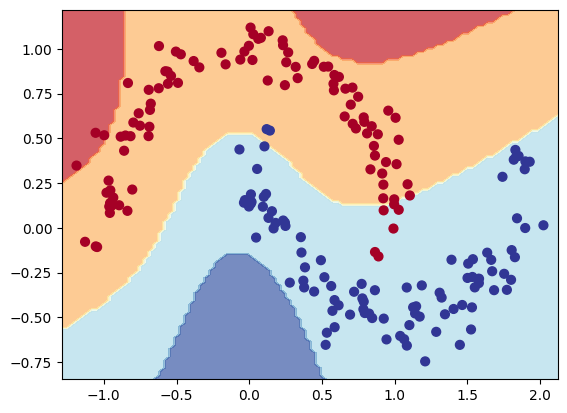

In [56]:
plot_decision_boundary(model=model_2,
                       X=X_test,
                       y=y_test)

313/313 [==============================] - 1s 2ms/step
binary classification


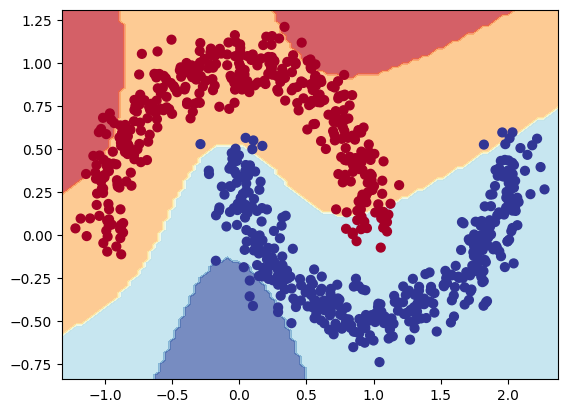

In [57]:
plot_decision_boundary(model=model_2,
                       X=X_train,
                       y=y_train)